Bài 1. Cho phương trình f(x)= x^2, hãy sử dụng thuật toán gradient descent để tối ưu. Sau đó vẽ đồ thị hàm f(x) sau 10 lần cập nhật bước 2 với:

*   Lr = 0.2
*   Lr = 2

In [ ]:
import torch
import matplotlib.pyplot as plt

# Define the function f(x) = x^2
def f(x):
    return x**2

# Gradient Descent optimization function
def gradient_descent(lr, initial_x, num_iterations):
    x = torch.tensor(initial_x, requires_grad=True, dtype=torch.float32)
    optimizer = torch.optim.SGD([x], lr=lr)

    x_values = []
    losses = []

    for _ in range(num_iterations):
        optimizer.zero_grad()
        loss = f(x)
        loss.backward()
        optimizer.step()

        x_values.append(x.item())
        losses.append(loss.item())

    return x_values, losses

# Plot function f(x) and the gradient descent path
def plot_function_and_path(lr, initial_x, num_iterations):
    x_values, losses = gradient_descent(lr, initial_x, num_iterations)

    # Create the x values for the function plot
    x_function = torch.linspace(-5, 5, 100)
    y_function = f(x_function)

    plt.figure(figsize=(12, 5))

    # Plot the gradient descent path
    plt.subplot(1, 2, 2)
    plt.plot(x_function.numpy(), y_function.numpy(), label='f(x) = x^2', color='blue')
    plt.plot(x_values, losses, 'ro-', label=f'LR={lr}', markersize=5)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Gradient Descent with LR={lr}')

    plt.tight_layout()
    plt.show()


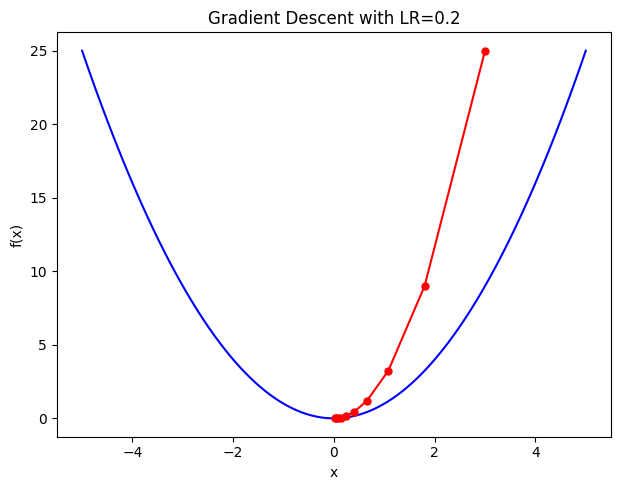

In [ ]:
plot_function_and_path(lr=0.2, initial_x=5., num_iterations=10)

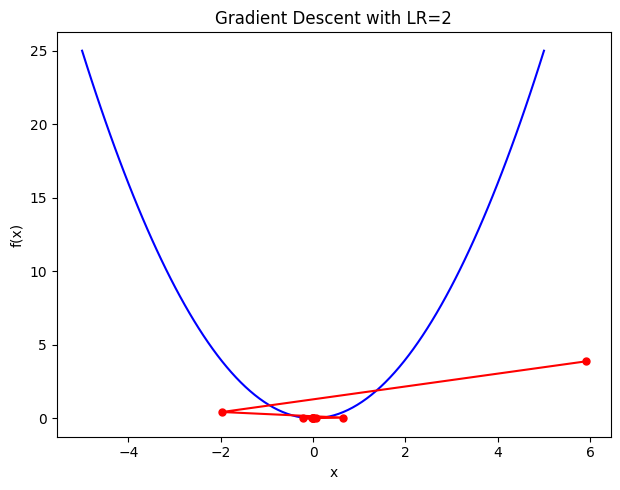

In [ ]:
plot_function_and_path(lr=2, initial_x=1e-4, num_iterations=10)

Bài 2.  Cho dataset dự đoán giá nhà dựa vào diện tích (https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_linear.csv) Dựa vào code mẫu hãy
*   Implement thuật toán linear regression với dữ liệu trên
*   Chỉnh learning rate cho dữ liệu trên, chọn 1 learning rate lớn bị overshoot, 1 learning vừa, và 1 learning rate nhỏ. Với mỗi learning rate, vẽ đồ thị loss tương ứng
* Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test


In [20]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler


# Load the dataset
url = "https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv"
data = pd.read_csv(url)
X = data['Diện tích'].values
y = data['Giá'].values

X = X.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

def train_model(lr, num_epochs, X_train, y_train):
    model = LinearRegressionModel()
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    losses = []

    for epoch in range(num_epochs):
        inputs = torch.from_numpy(X_train).float()
        labels = torch.from_numpy(y_train).float().view(-1, 1)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    return model, losses


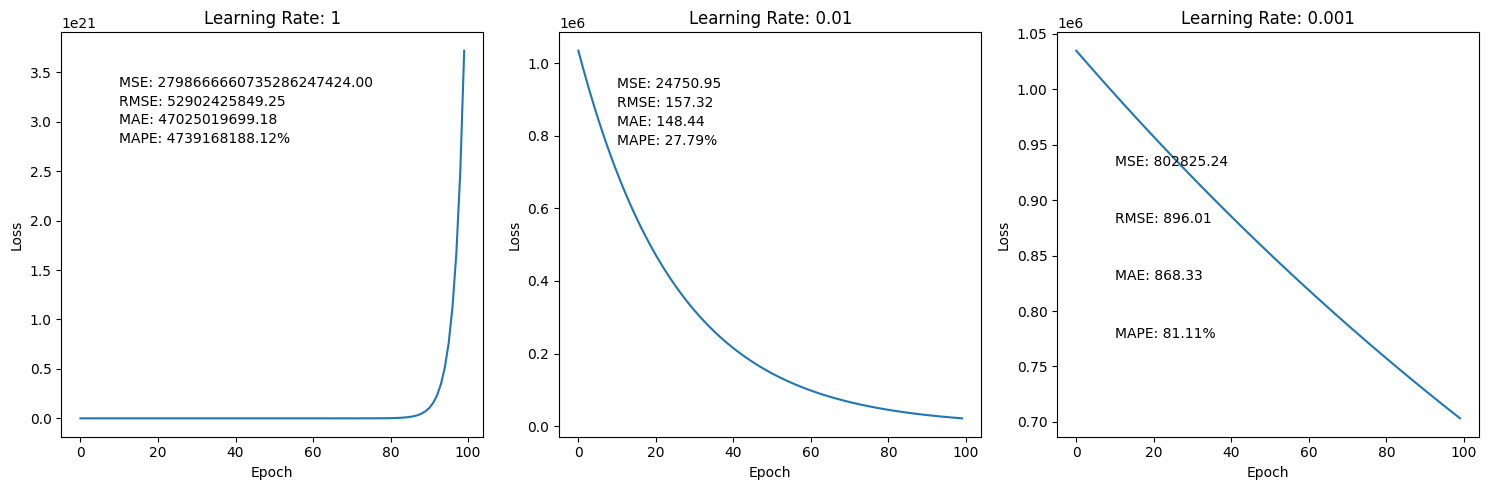

In [24]:
learning_rates = [1, 0.01, 0.001]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, lr in enumerate(learning_rates):
    model, losses = train_model(lr, num_epochs=100, X_train=X_train, y_train=y_train)

    axs[i].plot(losses)
    axs[i].set_title(f'Learning Rate: {lr}')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('Loss')

    X_test_tensor = torch.from_numpy(X_test).float()
    y_pred = model(X_test_tensor).detach().numpy()

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    axs[i].text(10, max(losses) * 0.9, f'MSE: {mse:.2f}', fontsize=10)
    axs[i].text(10, max(losses) * 0.85, f'RMSE: {rmse:.2f}', fontsize=10)
    axs[i].text(10, max(losses) * 0.8, f'MAE: {mae:.2f}', fontsize=10)
    axs[i].text(10, max(losses) * 0.75, f'MAPE: {mape:.2f}%', fontsize=10)

plt.tight_layout()
plt.show()